In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [4]:
hf = h5py.File('./data.h5', 'r')

# wd -> weight decay (of decoder), zero weight decay for embedding vectors
# lr -> learning rate (of decoder), fix 1e-3 learning rate for embedding vectors
# coarse -> sweep in a large region; fine -> carefully sweep a small region (where grokking is present)
# train -> number of steps to reach train acc >= 0.9
# test -> number of steps to reach test acc >= 0.9
# rqi -> representation qualtity index, i.e. (normalized) parallelogram count.

wd_coarse = np.array(hf.get("wd_coarse"))
lr_coarse = np.array(hf.get("lr_coarse"))
train_coarse = np.array(hf.get("train_coarse"))
test_coarse = np.array(hf.get("test_coarse"))
rqi_coarse = np.array(hf.get("rqi_coarse"))

wd_fine = np.array(hf.get("wd_fine"))
lr_fine = np.array(hf.get("lr_fine"))
train_fine = np.array(hf.get("train_fine"))
test_fine = np.array(hf.get("test_fine"))
rqi_fine = np.array(hf.get("rqi_fine"))

hf.close()

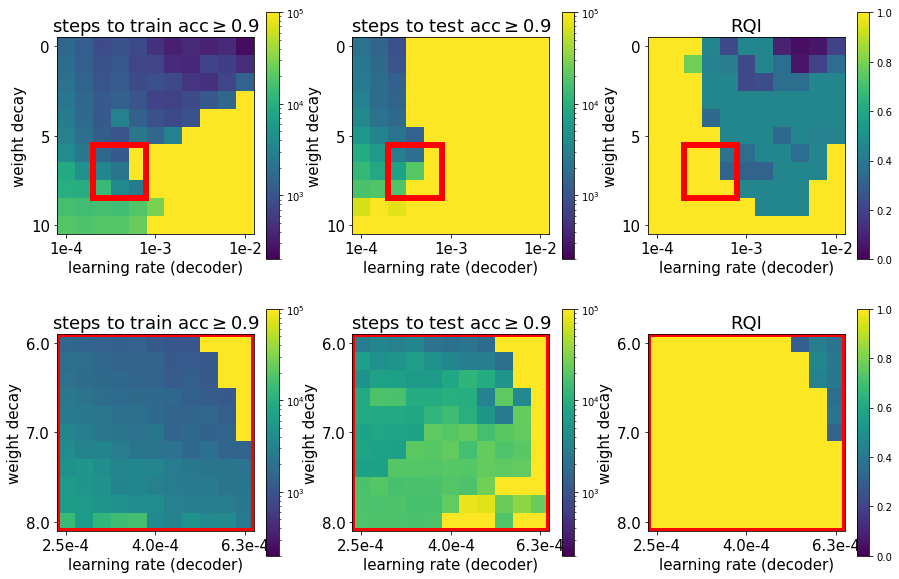

In [5]:
import matplotlib
from matplotlib.patches import Rectangle

plt.figure(figsize=(15,10))

plt.subplot(2,3,1)

plt.imshow(train_coarse, norm=matplotlib.colors.LogNorm())
plt.xlabel("learning rate (decoder)",fontsize=15)
plt.ylabel("weight decay",fontsize=15)
plt.yticks([0,5,10],[wd_coarse[0], wd_coarse[5], wd_coarse[10]],fontsize=15)
plt.xticks([0,5,10], ["1e-4", "1e-3", "1e-2"],fontsize=15)
plt.colorbar()
plt.clim(200,1e5)
plt.title('steps to train acc'+r"$\geq 0.9$",fontsize=18)

plt.gca().add_patch(Rectangle((1.5,5.5),3,3,
                    edgecolor='red',
                    facecolor='none',
                    lw=6))

plt.subplot(2,3,2)

plt.imshow(test_coarse, norm=matplotlib.colors.LogNorm())
plt.xlabel("learning rate (decoder)",fontsize=15)
plt.ylabel("weight decay",fontsize=15)
plt.yticks([0,5,10],[wd_coarse[0], wd_coarse[5], wd_coarse[10]],fontsize=15)
plt.xticks([0,5,10], ["1e-4", "1e-3", "1e-2"],fontsize=15)
plt.colorbar()
plt.clim(200,1e5)
plt.title('steps to test acc'+r"$\geq 0.9$",fontsize=18)

plt.gca().add_patch(Rectangle((1.5,5.5),3,3,
                    edgecolor='red',
                    facecolor='none',
                    lw=6))

plt.subplot(2,3,3)

plt.imshow(rqi_coarse)
plt.xlabel("learning rate (decoder)",fontsize=15)
plt.ylabel("weight decay",fontsize=15)
plt.yticks([0,5,10],[wd_coarse[0], wd_coarse[5], wd_coarse[10]],fontsize=15)
plt.xticks([0,5,10], ["1e-4", "1e-3", "1e-2"],fontsize=15)
plt.colorbar()
plt.clim(0,1)
plt.title("RQI",fontsize=18)

plt.gca().add_patch(Rectangle((1.5,5.5),3,3,
                    edgecolor='red',
                    facecolor='none',
                    lw=6))

plt.subplot(2,3,4)

plt.imshow(train_fine, norm=matplotlib.colors.LogNorm())
plt.xlabel("learning rate (decoder)",fontsize=15)
plt.ylabel("weight decay",fontsize=15)
plt.yticks([0,5,10],[wd_fine[0], wd_fine[5], wd_fine[10]],fontsize=15)
plt.xticks([0,5,10], ["2.5e-4", "4.0e-4", "6.3e-4"],fontsize=15)
plt.colorbar()
plt.clim(200,1e5)
plt.title('steps to train acc'+r"$\geq 0.9$",fontsize=18)

plt.gca().add_patch(Rectangle((-0.5,-0.5),11,11,
                    edgecolor='red',
                    facecolor='none',
                    lw=6))

plt.subplot(2,3,5)

plt.imshow(test_fine, norm=matplotlib.colors.LogNorm())
plt.xlabel("learning rate (decoder)",fontsize=15)
plt.ylabel("weight decay",fontsize=15)
plt.yticks([0,5,10],[wd_fine[0], wd_fine[5], wd_fine[10]],fontsize=15)
plt.xticks([0,5,10], ["2.5e-4", "4.0e-4", "6.3e-4"],fontsize=15)
plt.colorbar()
plt.clim(200,1e5)
plt.title('steps to test acc'+r"$\geq 0.9$",fontsize=18)

plt.gca().add_patch(Rectangle((-0.5,-0.5),11,11,
                    edgecolor='red',
                    facecolor='none',
                    lw=6))

plt.subplot(2,3,6)

plt.imshow(rqi_fine)
plt.xlabel("learning rate (decoder)",fontsize=15)
plt.ylabel("weight decay",fontsize=15)
plt.yticks([0,5,10],[wd_fine[0], wd_fine[5], wd_fine[10]],fontsize=15)
plt.xticks([0,5,10], ["2.5e-4", "4.0e-4", "6.3e-4"],fontsize=15)
plt.colorbar()
plt.clim(0,1)
plt.title("RQI",fontsize=18)

plt.gca().add_patch(Rectangle((-0.5,-0.5),11,11,
                    edgecolor='red',
                    facecolor='none',
                    lw=6))

Text(0.5, 1.0, 'coarse')

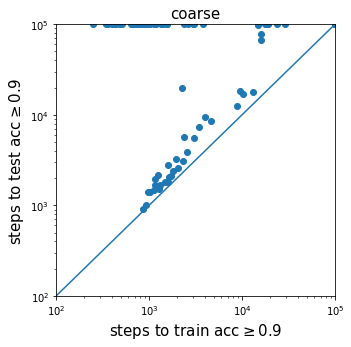

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(train_coarse.reshape(-1,), test_coarse.reshape(-1,))
plt.xscale('log')
plt.yscale('log')
plt.plot([1e2,1e5],[1e2,1e5])
plt.xlim(1e2,1e5)
plt.ylim(1e2,1e5)
plt.xlabel('steps to train acc'+r"$\geq 0.9$",fontsize=15)
plt.ylabel('steps to test acc'+r"$\geq 0.9$",fontsize=15)
plt.title("coarse",fontsize=15)

Text(0.5, 1.0, 'fine')

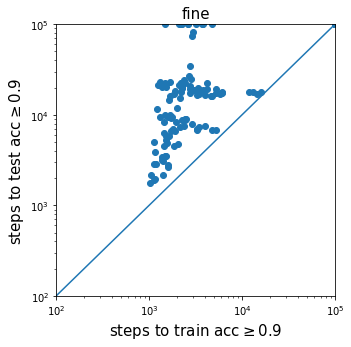

In [7]:
plt.figure(figsize=(5,5))
plt.scatter(train_fine.reshape(-1,), test_fine.reshape(-1,))
plt.xscale('log')
plt.yscale('log')
plt.plot([1e2,1e5],[1e2,1e5])
plt.xlim(1e2,1e5)
plt.ylim(1e2,1e5)
plt.xlabel('steps to train acc'+r"$\geq 0.9$",fontsize=15)
plt.ylabel('steps to test acc'+r"$\geq 0.9$",fontsize=15)
plt.title("fine",fontsize=15)